# House Price Predictions with Linear Regression

In [12]:
%run Coding_linear_regression.ipynb 
# allows us to use the functions we wrote

import pandas

ModuleNotFoundError: No module named 'utils'

### Exploring the relationship between price and area

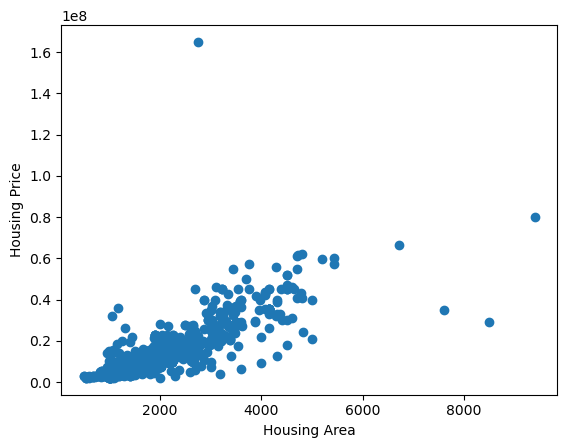

In [2]:
data = pandas.read_csv('Hyderabad.csv')
plot_scatter(
    data['Area'], data['Price'], "Housing Area", "Housing Price")
plt.show()

## With turicreate

### Testing a model with only one feature

In [17]:
import turicreate as tc
data_tc = tc.SFrame('Hyderabad.csv')
data

Finished parsing file /Users/cpicon/PycharmProjects/manning/Chapter_3_Linear_Regression/refactored/Hyderabad.csv

Parsing completed. Parsed 100 lines in 0.02431 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cpicon/PycharmProjects/manning/Chapter_3_Linear_Regression/refactored/Hyderabad.csv

Parsing completed. Parsed 2518 lines in 0.024501 secs.

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,Nacharam,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,Manikonda,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,Madhapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,Hitech City,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

slope: 9677.995350906074
y-intercept: -6098019.308481174


Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.002039     | 144483532.093489   | 21943641.624132      | 4956591.986387                  | 3766460.547838                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

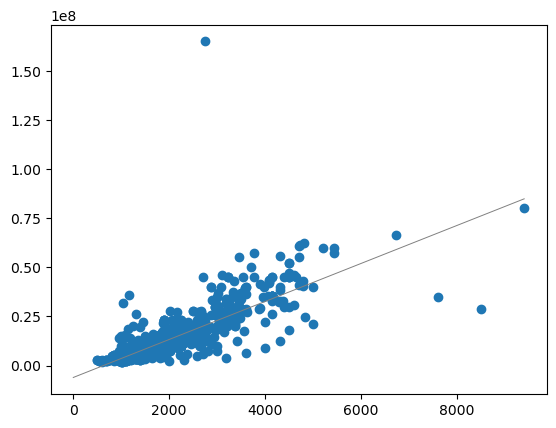

In [7]:
simple_model = tc.linear_regression.create(data_tc, features=['Area'], target='Price')
simple_model.coefficients
b, m = simple_model.coefficients['value']
print("slope:", m)
print("y-intercept:", b)

plot_scatter(data_tc['Area'], data_tc['Price'])
draw_line(m, b, starting=0, ending=max(data_tc['Area']))
plt.show()

### Building a model that uses all the features

In [14]:
model = tc.linear_regression.create(data, target='Price')

ToolkitError: Input training dataset is not an SFrame. If it is a Pandas DataFrame, you may use the to_sframe() function to convert it to an SFrame.

In [ ]:
model.coefficients

In [ ]:
model.evaluate(data)

In [ ]:
house = tc.SFrame({'Area': [1000], 'No. of Bedrooms':[3]})
model.predict(house)

# With statsmodels

### Testing a model with only one feature

statsmodels doesn't automatically add an intercept (constant bias) column, so we have to add that ourselves.

In [ ]:
import statsmodels.api as sm

exog = sm.add_constant(data['Area']) # adds an intercept column
model_linear_regression = sm.OLS(
    endog = data['Price'],
    exog = exog)
results_regression = model_linear_regression.fit()

In [ ]:
results_regression.summary()

In [ ]:
results_regression.params

In [ ]:
plot_scatter(
    data['Area'], data['Price'], "Housing Area", "Housing Price")
draw_line(*results_regression.params[::-1], starting=0, ending=max(data['Area']))
plt.show()

In [ ]:
plot_scatter(
    results_regression.fittedvalues,
    results_regression.resid,
    x_label = "Fitted Values",
    y_label = "Residual Values")
plt.show()
# Not sure why it plots twice
sm.qqplot(results_regression.resid_pearson, line = "q")

### Building a model that uses all the features

statsmodels doesn't handle categorical values for us, so we need to adjust our dataset using `pandas.get_dummies()`

In [ ]:
exog = data.copy()
exog = sm.add_constant(exog) # adds an intercept column
exog = pandas.get_dummies(exog) # Converts categorical to one-hot
endog = exog.pop("Price")

model_linear_regression = sm.OLS(
    endog = endog,
    exog = exog)
results_regression = model_linear_regression.fit()

In [ ]:
results_regression.summary() # yields a very large printout

In [ ]:
results_regression.params

In [ ]:
plot_scatter(
    results_regression.fittedvalues,
    results_regression.resid,
    x_label = "Fitted Values",
    y_label = "Residual Values")
plt.show()
# Not sure why it plots twice
sm.qqplot(results_regression.resid_pearson, line = "q")

In [ ]:
house = { 'No. of Bedrooms' : 3, 'Area': 1000 }

def predict_linear_regression(fitted_model, dict_features):
    """ 
    Calculates y ~ const + sum( parameter*value )

    { 'feature name' : value }
    
    Does not assume you have all features present, so prediction may be off.
    Assumes const parameter is not present in dictionary
    """
    list_given_terms = [
        fitted_model.params[key]*value for key, value in dict_features.items()
    ]
    constant_value = fitted_model.params['const']
    list_given_terms.append(constant_value)
    
    return sum(list_given_terms)

prediction = predict_linear_regression(results_regression, house)
print("Predicted housing price:", prediction)